In [1]:
import numpy as np
import matplotlib.pyplot as matplot
%matplotlib inline
matplot.rcdefaults()
from sklearn.metrics import accuracy_score
import seaborn as sb
from sklearn.svm import SVC, LinearSVC
import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.keras.datasets import mnist
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten each input image into a vector of length 784 
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

X_train = X_train/255 
X_test = X_test/255 
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


LinearSVC with Sklearn

In [7]:
svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

In [8]:
svm.coef_
svm.intercept_

array([-1.20425346, -0.13528991, -0.81761425, -1.19377571, -0.5096537 ,
        0.03750279, -1.15103065, -0.24062725, -2.08390155, -1.32337793])

In [9]:
pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.9181


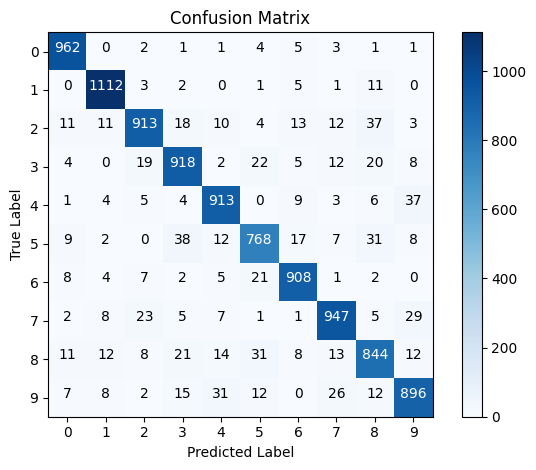

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
# Tính confusion matrix
cm = confusion_matrix(y_test, pred)

# Vẽ biểu đồ confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

LinearSVC with Numpy

Iteration 0/1000: Loss 9.005797461992245
Iteration 100/1000: Loss 0.714303729616234
Iteration 200/1000: Loss 1.0429676534286878
Iteration 300/1000: Loss 1.0915436911786798
Iteration 400/1000: Loss 1.0199552351496646
Iteration 500/1000: Loss 0.7386844016420089
Iteration 600/1000: Loss 0.7431911912550906
Iteration 700/1000: Loss 0.7855608400645229
Iteration 800/1000: Loss 0.7223295153579039
Iteration 900/1000: Loss 1.1136362538874753


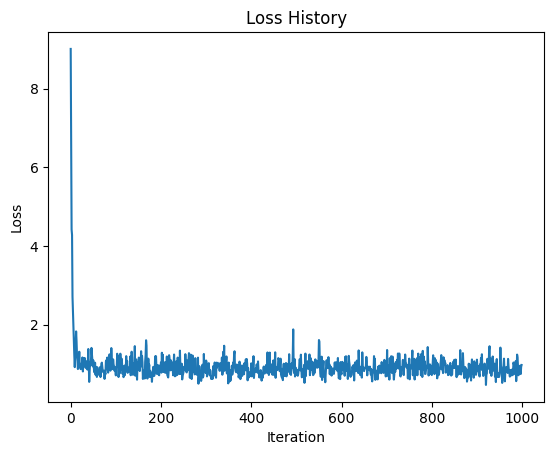

Accuracy: 0.8795


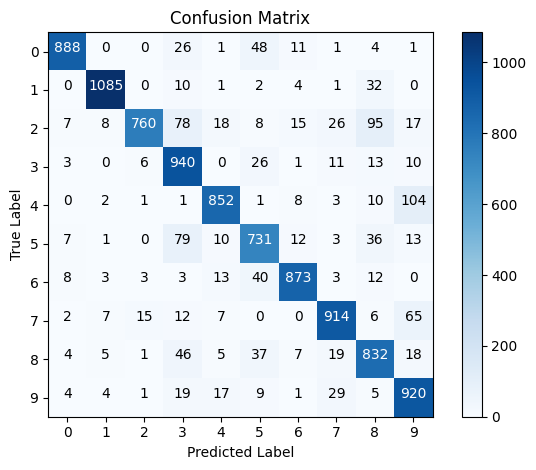

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
# Hàm tính loss và gradient của SVM đa lớp
def svm_loss_vectorized(W, X, y, reg):
    num_train = X.shape[0]
    num_classes = W.shape[1]
    scores = X.dot(W)
    correct_class_scores = scores[np.arange(num_train), y].reshape(-1, 1)
    margins = np.maximum(0, scores - correct_class_scores + 1)
    margins[np.arange(num_train), y] = 0
    loss = np.sum(margins) / num_train
    loss += 0.5 * reg * np.sum(W * W)
    
    margins[margins > 0] = 1
    valid_margin_count = np.sum(margins, axis=1)
    margins[np.arange(num_train), y] -= valid_margin_count
    dW = X.T.dot(margins) / num_train
    dW += reg * W
    
    return loss, dW

# Hàm huấn luyện SVM đa lớp
def multiclass_svm_GD(X, y, Winit, reg, lr=.1, batch_size=100, num_iters=1000, print_every=100):
    W = Winit
    loss_history = []
    num_train = X.shape[0]
    
    for it in range(num_iters):
        batch_indices = np.random.choice(num_train, batch_size)  # Chỉ chọn các chỉ số hợp lệ
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        
        loss, grad = svm_loss_vectorized(W, X_batch, y_batch, reg)
        loss_history.append(loss)
        
        W -= lr * grad
        
        if it % print_every == 0:
            print(f'Iteration {it}/{num_iters}: Loss {loss}')
            
    return W, loss_history

# Khởi tạo trọng số W ngẫu nhiên
num_classes = 10
W_init = np.random.randn(28 * 28, num_classes) * 0.001

# Huấn luyện mô hình
reg = 0.05
W, loss_history = multiclass_svm_GD(X_train, y_train, W_init, reg)

# Hiển thị đồ thị loss
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# Dự đoán nhãn của tập kiểm tra
pred = np.argmax(X_test.dot(W), axis=1)

# Tính độ chính xác
accuracy = accuracy_score(y_test, pred)
print(f'Accuracy: {accuracy:.4f}')


# Tính confusion matrix
cm = confusion_matrix(y_test, pred)

# Vẽ biểu đồ confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

In [7]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
precision = precision_score(y_test, pred, average='macro')
recall = recall_score(y_test, pred, average='macro')
print("Recall:", recall)
print("Precision:", precision)

Recall: 0.878270244346122
Precision: 0.8846877641338591


As we can see that the SVM does a pretty decent job at classifying, we still get the usual misclassification on 5-8, 2-8, 5-3, 4-9. However, accuracy of 91.82% is good

(i) Running Linear SVC for multiple cost factor(s) C

In [11]:
acc = []
acc_tr = []
coefficient = []
for c in [0.001,0.01,0.1,1,10,100,1000]:
    svm = LinearSVC(C=c)
    svm.fit(X_train, y_train)
    coef = svm.coef_
    
    p_tr = svm.predict(X_train)
    a_tr = accuracy_score(y_train, p_tr)
    
    pred = svm.predict(X_test)
    a = accuracy_score(y_test, pred)
    
    coefficient.append(coef)
    acc_tr.append(a_tr)
    acc.append(a)

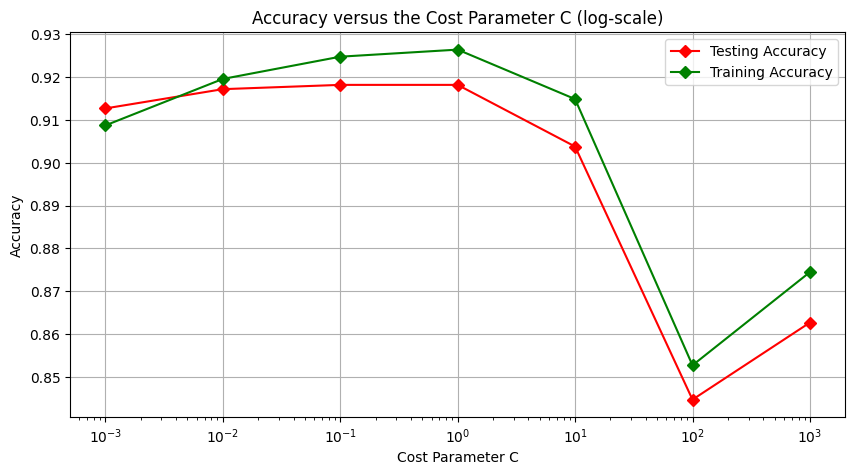

In [12]:
c = [0.001,0.01,0.1,1,10,100,1000]

matplot.subplots(figsize=(10, 5))
matplot.semilogx(c, acc,'-gD' ,color='red' , label="Testing Accuracy")
matplot.semilogx(c, acc_tr,'-gD' , label="Training Accuracy")
#matplot.xticks(L,L)
matplot.grid(True)
matplot.xlabel("Cost Parameter C")
matplot.ylabel("Accuracy")
matplot.legend()
matplot.title('Accuracy versus the Cost Parameter C (log-scale)')
matplot.show()

We clearly see a bias variance trade off in the graph. As the cost increases, the Training accuracy increases, so as the test accuracy, but only till c=1, then we see over fitting. From, c=10 to 1000 we see the model overfitting and we see Low Bias and High Variance
**So as we go from Left to Right: Bias Decreases and Variance Increases**

(ii) We choose the model with best testing accuracy i.e. c = 1

In [13]:
svm_coef = coefficient[4]
svm_coef.shape

(10, 784)

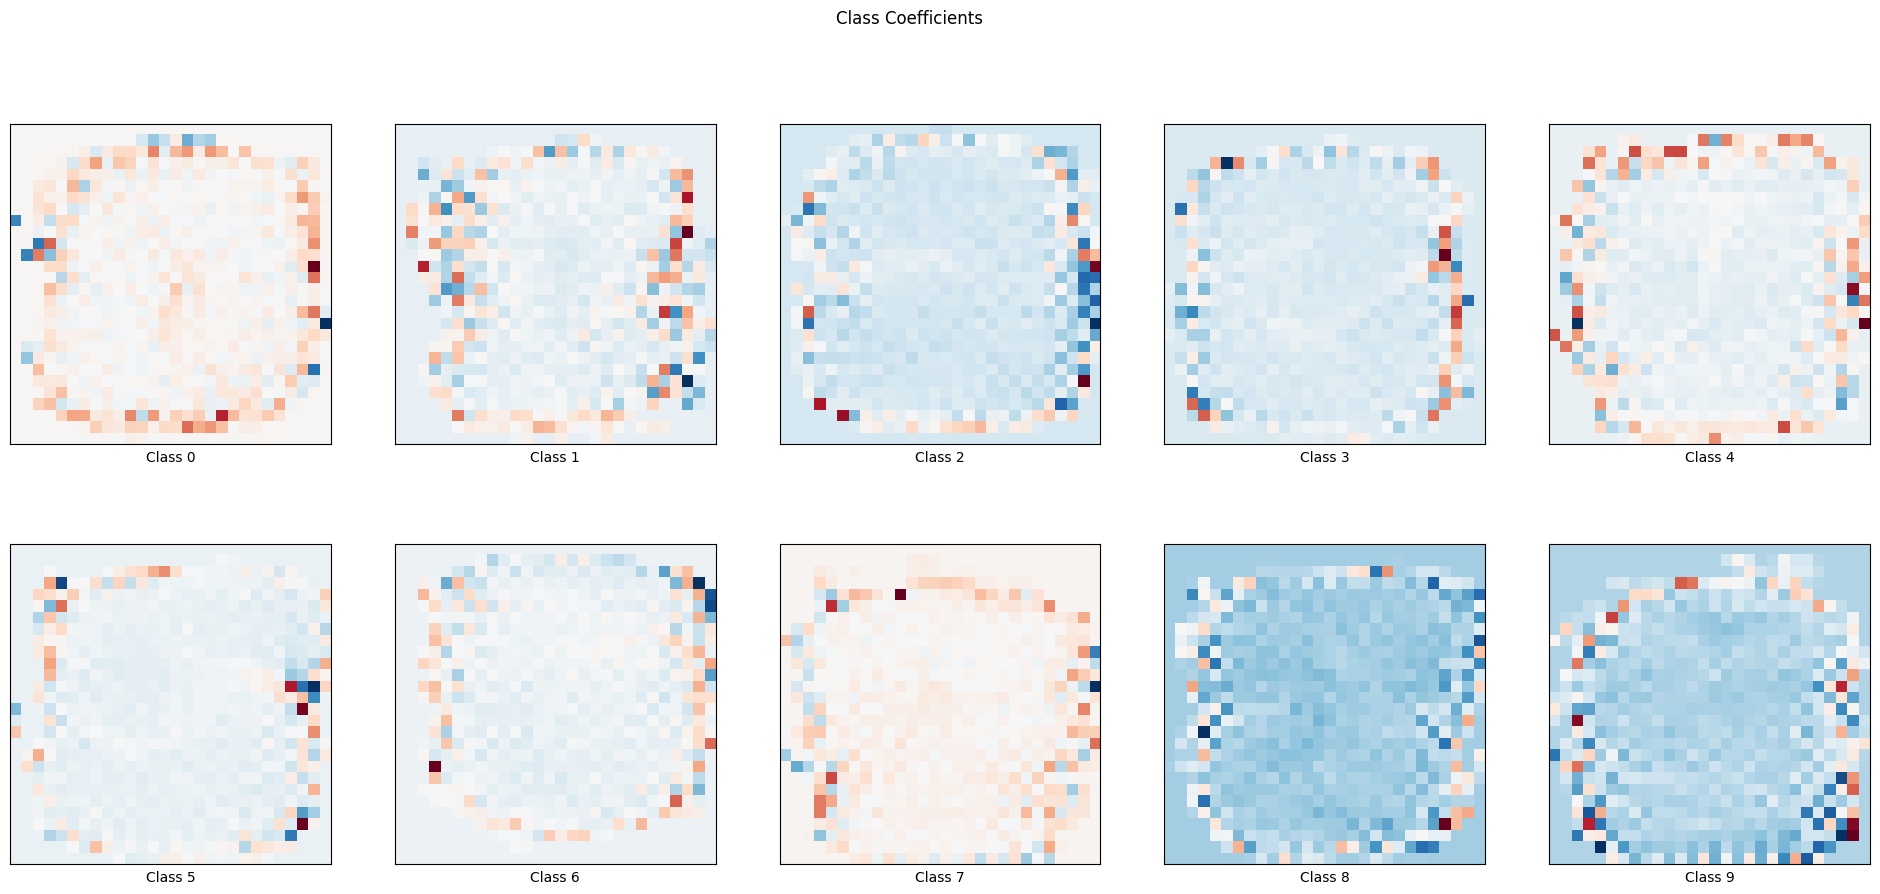

In [14]:
matplot.subplots(2,5, figsize=(24,10))
for i in range(10):
    l1 = matplot.subplot(2, 5, i + 1)
    l1.imshow(svm_coef[i].reshape(28, 28), cmap=matplot.cm.RdBu)
    l1.set_xticks(())
    l1.set_yticks(())
    l1.set_xlabel('Class %i' % i)
matplot.suptitle('Class Coefficients')
matplot.show()

These images look nothing like the images we saw in Naive Bayes. In Naive Bayes, the underlying number was clearly visible. However, here you dont see any apparant patterns or distinctness and really hard to differentiate.

SVC RBF kernel

In [4]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

accuracy: 0.9792 



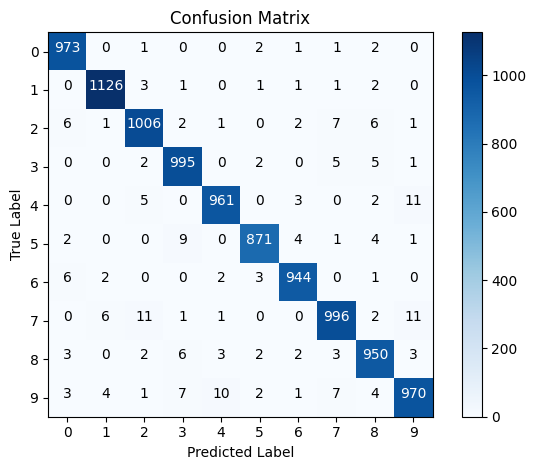

In [8]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ biểu đồ confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

SVC Poly kernel

In [9]:
# non-linear model
# using poly kernel, C=1, default value of degree

# model
non_linear_model = SVC(kernel='poly')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

accuracy: 0.9771 



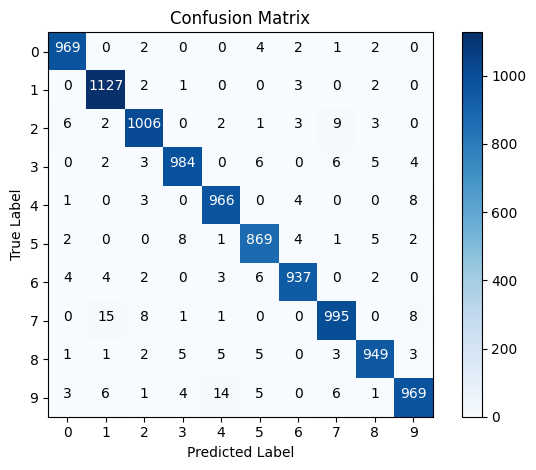

In [11]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
# Tính confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Vẽ biểu đồ confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

**SVM with 'rbf' kernel gives the best result among all these models.**

Predict with test dataset

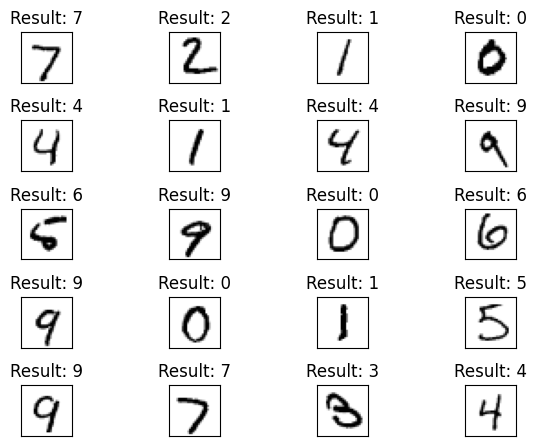

In [8]:
for i in range(20):
    plt.subplot(5, 4, i + 1)
    plt.tight_layout()
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[i].reshape(28, 28), cmap='binary')  # Hiển thị ảnh grayscale
    plt.title(f"Result: {pred[i]}")  # Nhãn dự đoán
plt.show()

Predict with the data we collect ourselves

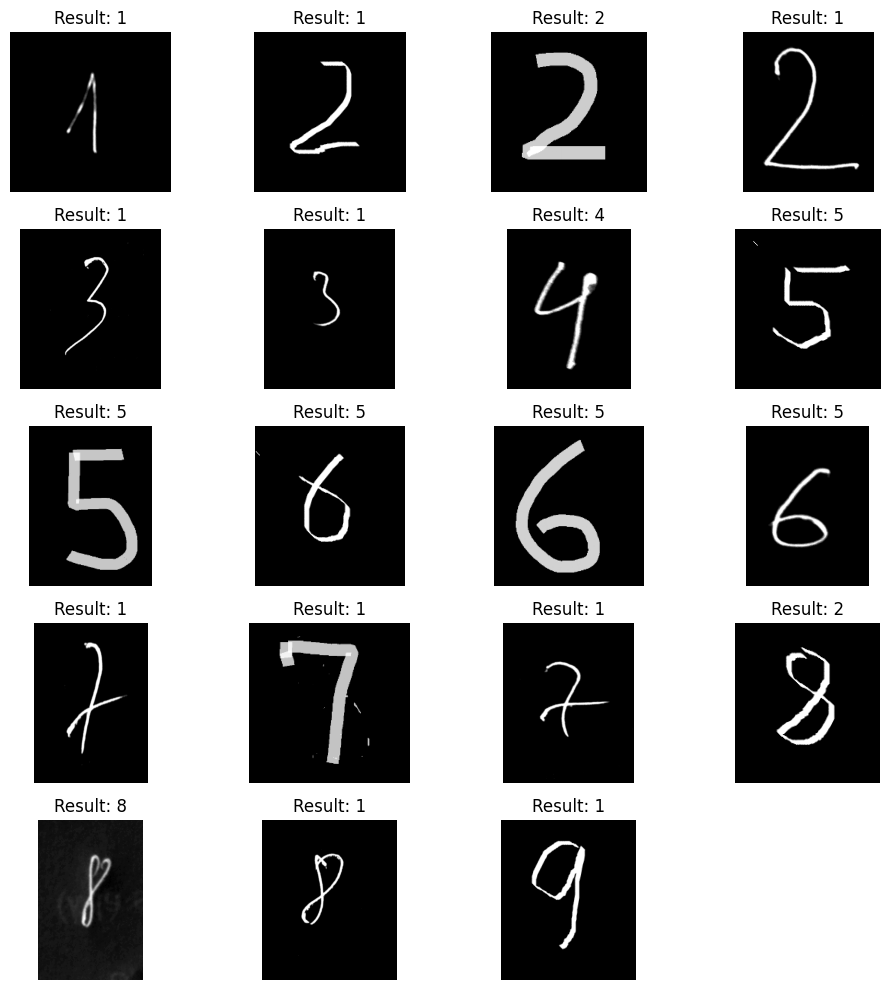

In [17]:
import os
import numpy as np
import cv2
from PIL import Image

digits = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

folder_path = r"data_real"

fig = plt.figure(figsize=(10, 10))

for i, filename in enumerate(os.listdir(folder_path)):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(folder_path, filename)
        frame = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) / 255.0
        im = Image.fromarray(frame)
        im = im.resize((28, 28))
        
        img_array = np.array(im)
        img_array = img_array.reshape(1, 784)  # chuyển về (1, 784) để khớp với kích thước của train_images
        predict = non_linear_model.predict(1.0-img_array)
        ax = fig.add_subplot(5, 4, i+1)
        ax.imshow(frame, cmap='binary')
        ax.set_title('Result: ' + str(predict[0]))
        ax.axis('off')
    else:
        continue

plt.tight_layout()
plt.show()